# Master Thesis - H4 Analysis

## H4 = hypothesis 4

#### Hypothesis 4 = Firms with higher Price to Book ratios exhibit higher sensitivity to tightening monetary shocks.

### Kristoffer Stjern & Daniel W. Kabré

# -----------------------------------------------------------------------------------------

# Chapter 0) Settings

## 0.1) Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
import statsmodels.api as sm
from scipy import stats
import warnings

warnings.simplefilter("ignore")

## 0.2) Parameters

## Chapter 1) Importing Data

In [2]:
df_high = pd.read_excel("Data/Finished Dataframes/H4_high_PB.xlsx")
df_high.index = pd.to_datetime(df_high["Unnamed: 0"])
df_high.drop("Unnamed: 0",axis=1,inplace=True)

df_low = pd.read_excel("Data/Finished Dataframes/H4_low_PB.xlsx")
df_low.index = pd.to_datetime(df_low["Unnamed: 0"])
df_low.drop("Unnamed: 0",axis=1,inplace=True)

df_high.index.name = "Date"
df_low.index.name = "Date"

In [3]:
df_low

,Firm Name,K1,K2,K3,K4,K5,K6,K7,CPI,EPU,PMI,EUVOL,USD/NOK,Unemployment,Brent,BRW,FF4
Date,,,,,,,,,,,,,,,,,
1999-03-03,SUBSEA 7,0.127935,-0.079295,-0.011455,0.094693,-0.039546,-0.084040,0.003647,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
1999-03-03,BONHEUR,0.270924,-0.062893,-0.009561,0.003943,0.043595,-0.115201,-0.033927,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
1999-03-03,DNO,-0.140841,0.142949,-0.013957,0.123857,-0.048683,-0.073961,0.014853,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
1999-03-03,MOWI,0.417993,0.113435,0.079738,-0.028921,0.142083,0.028329,0.046102,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
1999-03-03,NORSK HYDRO,0.027275,-0.101996,-0.051435,-0.007222,0.053083,0.015274,-0.030627,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,PROSAFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,365.603386,124.9,16.9607,11.0454,4.3,75.46,0.108766,-0.0177
2024-12-19,STOLT-NIELSEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,365.603386,124.9,16.9607,11.0454,4.3,75.46,0.108766,-0.0177
2024-12-19,SOLSTAD OFFSHORE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,365.603386,124.9,16.9607,11.0454,4.3,75.46,0.108766,-0.0177


In [4]:
df_high

,Firm Name,K1,K2,K3,K4,K5,K6,K7,CPI,EPU,PMI,EUVOL,USD/NOK,Unemployment,Brent,BRW,FF4
Date,,,,,,,,,,,,,,,,,
1999-03-03,NRC GROUP,-0.141423,-0.108202,0.183174,-0.028921,0.025414,0.160077,0.072945,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
1999-03-03,ATEA,0.040287,-0.016920,-0.006788,-0.055243,0.097050,-0.029713,-0.148678,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
1999-03-03,GOODTECH,-0.105006,-0.115329,0.133082,0.029902,-0.080141,-0.293427,0.031802,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
1999-03-03,HEXAGON COMPOSITES,-0.010223,-0.102939,0.117388,-0.043275,-0.170218,-0.231860,-0.135523,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
1999-03-03,ITERA,0.010233,0.002324,0.175417,-0.066277,0.014219,-0.154208,0.104508,2.1,79.740078,NaN,30.8000,7.7188,3.2,10.62,-0.350005,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-19,SCHIBSTED A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,365.603386,124.9,16.9607,11.0454,4.3,75.46,0.108766,-0.0177
2024-12-19,SCANA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,365.603386,124.9,16.9607,11.0454,4.3,75.46,0.108766,-0.0177
2024-12-19,TOMRA SYSTEMS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,365.603386,124.9,16.9607,11.0454,4.3,75.46,0.108766,-0.0177


## Chapter 2) Data Cleaning

### 2.1) DF_High

#### Dropping NANs

In [5]:
df_high_brw_k1 = df_high.drop(["K2",	"K3",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_high_brw_k1.dropna(subset=['K1'],inplace=True)

df_high_brw_k2 = df_high.drop(["K1",	"K3",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_high_brw_k2.dropna(subset=['K2'],inplace=True)

df_high_brw_k3 = df_high.drop(["K1",	"K2",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_high_brw_k3.dropna(subset=['K3'],inplace=True)

df_high_brw_k4 = df_high.drop(["K1",	"K2",	"K3"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_high_brw_k4.dropna(subset=['K4'],inplace=True)

df_high_brw_k5 = df_high.drop(["K1",	"K2",	"K3"	,"K4",	"K6",	"K7","FF4"],axis=1)
df_high_brw_k5.dropna(subset=['K5'],inplace=True)

df_high_brw_k6 = df_high.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K7","FF4"],axis=1)
df_high_brw_k6.dropna(subset=['K6'],inplace=True)

df_high_brw_k7 = df_high.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K6","FF4"],axis=1)
df_high_brw_k7.dropna(subset=['K7'],inplace=True)





### FF4

df_high_ff4_k1 = df_high.drop(["K2",	"K3",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_high_ff4_k1.dropna(subset=['K1'],inplace=True)
df_high_ff4_k1.dropna(subset=['FF4'],inplace=True)

df_high_ff4_k2 = df_high.drop(["K1",	"K3",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_high_ff4_k2.dropna(subset=['K2'],inplace=True)
df_high_ff4_k2.dropna(subset=['FF4'],inplace=True)

df_high_ff4_k3 = df_high.drop(["K1",	"K2",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_high_ff4_k3.dropna(subset=['K3'],inplace=True)
df_high_ff4_k3.dropna(subset=['FF4'],inplace=True)

df_high_ff4_k4 = df_high.drop(["K1",	"K2",	"K3"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_high_ff4_k4.dropna(subset=['K4'],inplace=True)
df_high_ff4_k4.dropna(subset=['FF4'],inplace=True)

df_high_ff4_k5 = df_high.drop(["K1",	"K2",	"K3"	,"K4",	"K6",	"K7","BRW"],axis=1)
df_high_ff4_k5.dropna(subset=['K5'],inplace=True)
df_high_ff4_k5.dropna(subset=['FF4'],inplace=True)

df_high_ff4_k6 = df_high.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K7","BRW"],axis=1)
df_high_ff4_k6.dropna(subset=['K6'],inplace=True)
df_high_ff4_k6.dropna(subset=['FF4'],inplace=True)

df_high_ff4_k7 = df_high.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K6","BRW"],axis=1)
df_high_ff4_k7.dropna(subset=['K7'],inplace=True)
df_high_ff4_k7.dropna(subset=['FF4'],inplace=True)

In [6]:
df_high_ff4_k7

,Firm Name,K7,CPI,EPU,PMI,EUVOL,USD/NOK,Unemployment,Brent,FF4
Date,,,,,,,,,,
1999-06-16,SUBSEA 7,0.139550,2.5,70.473489,NaN,24.9900,7.7513,2.6,14.75,0.08000
1999-06-16,NRC GROUP,-0.080176,2.5,70.473489,NaN,24.9900,7.7513,2.6,14.75,0.08000
1999-06-16,ATEA,0.007201,2.5,70.473489,NaN,24.9900,7.7513,2.6,14.75,0.08000
1999-06-16,GOODTECH,-0.299099,2.5,70.473489,NaN,24.9900,7.7513,2.6,14.75,0.08000
1999-06-16,HEXAGON COMPOSITES,-0.043042,2.5,70.473489,NaN,24.9900,7.7513,2.6,14.75,0.08000
...,...,...,...,...,...,...,...,...,...,...
2024-05-03,SCANA,0.034186,3.6,185.662192,115.9,15.5652,10.8911,3.6,89.38,-0.04509
2024-05-03,SOLSTAD OFFSHORE,-0.025728,3.6,185.662192,115.9,15.5652,10.8911,3.6,89.38,-0.04509
2024-05-03,TOMRA SYSTEMS,-0.037788,3.6,185.662192,115.9,15.5652,10.8911,3.6,89.38,-0.04509


#### Fill NANs

In [7]:
df_high_brw_k1.fillna(0,inplace=True)
df_high_brw_k2.fillna(0,inplace=True)
df_high_brw_k3.fillna(0,inplace=True)
df_high_brw_k4.fillna(0,inplace=True)
df_high_brw_k5.fillna(0,inplace=True)
df_high_brw_k6.fillna(0,inplace=True)
df_high_brw_k7.fillna(0,inplace=True)

df_high_ff4_k1.fillna(0,inplace=True)
df_high_ff4_k2.fillna(0,inplace=True)
df_high_ff4_k3.fillna(0,inplace=True)
df_high_ff4_k4.fillna(0,inplace=True)
df_high_ff4_k5.fillna(0,inplace=True)
df_high_ff4_k6.fillna(0,inplace=True)
df_high_ff4_k7.fillna(0,inplace=True)

### 2.1) DF_Low

#### Dropping NANs

In [8]:
df_low_brw_k1 = df_low.drop(["K2",	"K3",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_low_brw_k1.dropna(subset=['K1'],inplace=True)

df_low_brw_k2 = df_low.drop(["K1",	"K3",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_low_brw_k2.dropna(subset=['K2'],inplace=True)

df_low_brw_k3 = df_low.drop(["K1",	"K2",	"K4"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_low_brw_k3.dropna(subset=['K3'],inplace=True)

df_low_brw_k4 = df_low.drop(["K1",	"K2",	"K3"	,"K5",	"K6",	"K7","FF4"],axis=1)
df_low_brw_k4.dropna(subset=['K4'],inplace=True)

df_low_brw_k5 = df_low.drop(["K1",	"K2",	"K3"	,"K4",	"K6",	"K7","FF4"],axis=1)
df_low_brw_k5.dropna(subset=['K5'],inplace=True)

df_low_brw_k6 = df_low.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K7","FF4"],axis=1)
df_low_brw_k6.dropna(subset=['K6'],inplace=True)

df_low_brw_k7 = df_low.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K6","FF4"],axis=1)
df_low_brw_k7.dropna(subset=['K7'],inplace=True)





### FF4

df_low_ff4_k1 = df_low.drop(["K2",	"K3",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_low_ff4_k1.dropna(subset=['K1'],inplace=True)
df_low_ff4_k1.dropna(subset=['FF4'],inplace=True)

df_low_ff4_k2 = df_low.drop(["K1",	"K3",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_low_ff4_k2.dropna(subset=['K2'],inplace=True)
df_low_ff4_k2.dropna(subset=['FF4'],inplace=True)

df_low_ff4_k3 = df_low.drop(["K1",	"K2",	"K4"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_low_ff4_k3.dropna(subset=['K3'],inplace=True)
df_low_ff4_k3.dropna(subset=['FF4'],inplace=True)

df_low_ff4_k4 = df_low.drop(["K1",	"K2",	"K3"	,"K5",	"K6",	"K7","BRW"],axis=1)
df_low_ff4_k4.dropna(subset=['K4'],inplace=True)
df_low_ff4_k4.dropna(subset=['FF4'],inplace=True)

df_low_ff4_k5 = df_low.drop(["K1",	"K2",	"K3"	,"K4",	"K6",	"K7","BRW"],axis=1)
df_low_ff4_k5.dropna(subset=['K5'],inplace=True)
df_low_ff4_k5.dropna(subset=['FF4'],inplace=True)

df_low_ff4_k6 = df_low.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K7","BRW"],axis=1)
df_low_ff4_k6.dropna(subset=['K6'],inplace=True)
df_low_ff4_k6.dropna(subset=['FF4'],inplace=True)

df_low_ff4_k7 = df_low.drop(["K1",	"K2",	"K3"	,"K4",	"K5",	"K6","BRW"],axis=1)
df_low_ff4_k7.dropna(subset=['K7'],inplace=True)
df_low_ff4_k7.dropna(subset=['FF4'],inplace=True)

#### Fill NANs

In [9]:
df_low_brw_k1.fillna(0,inplace=True)
df_low_brw_k2.fillna(0,inplace=True)
df_low_brw_k3.fillna(0,inplace=True)
df_low_brw_k4.fillna(0,inplace=True)
df_low_brw_k5.fillna(0,inplace=True)
df_low_brw_k6.fillna(0,inplace=True)
df_low_brw_k7.fillna(0,inplace=True)

df_low_ff4_k1.fillna(0,inplace=True)
df_low_ff4_k2.fillna(0,inplace=True)
df_low_ff4_k3.fillna(0,inplace=True)
df_low_ff4_k4.fillna(0,inplace=True)
df_low_ff4_k5.fillna(0,inplace=True)
df_low_ff4_k6.fillna(0,inplace=True)
df_low_ff4_k7.fillna(0,inplace=True)

#### Organising Variables

In [10]:
high_brw = [df_high_brw_k1, df_high_brw_k2, df_high_brw_k3, df_high_brw_k4, df_high_brw_k5, df_high_brw_k6, df_high_brw_k7]
high_ff4 = [df_high_ff4_k1, df_high_ff4_k2, df_high_ff4_k3, df_high_ff4_k4, df_high_ff4_k5, df_high_ff4_k6, df_high_ff4_k7]

low_brw = [df_low_brw_k1, df_low_brw_k2, df_low_brw_k3, df_low_brw_k4, df_low_brw_k5, df_low_brw_k6, df_low_brw_k7]
low_ff4 = [df_low_ff4_k1, df_low_ff4_k2, df_low_ff4_k3, df_low_ff4_k4, df_low_ff4_k5, df_low_ff4_k6, df_low_ff4_k7]

## Chapter 3) Regression Analysis

### 3.1 BRW

In [11]:
high_brw_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
high_brw_result_df_c.index = ["Coeff", "95% conf Interval"]

low_brw_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
low_brw_result_df_c.index = ["Coeff", "95% conf Interval"]

high_brw_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
high_brw_result_df_nc.index = ["Coeff", "95% conf Interval"]

low_brw_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
low_brw_result_df_nc.index = ["Coeff", "95% conf Interval"]


In [12]:
alpha = 0.05

for i in range(len(high_brw)):
    X_high = high_brw[i].iloc[:,2:]
    X_high  = sm.add_constant(X_high)
    X_high_nc  = X_high[["const", "BRW"]]
    X_low = low_brw[i].iloc[:,2:]
    X_low  = sm.add_constant(X_low)
    X_low_nc  = X_low[["const", "BRW"]]

    
    Y_high = high_brw[i].iloc[:,1]
    Y_low = low_brw[i].iloc[:,1]

    

    result_high = sm.OLS(Y_high, X_high).fit()
    coef_high = result_high.params[-1]   
    se_high = result_high.bse[-1]
    

    # Compute confidence intervals
    dof_high = result_high.df_resid  # Degrees of freedom
    t_crit_high = stats.t.ppf(1 - alpha / 2, df=dof_high)  # Critical t-value

    ci_high = t_crit_high * se_high
    
    high_brw_result_df_c.iloc[0,i] = coef_high
    high_brw_result_df_c.iloc[1,i] = ci_high
    
    result_low = sm.OLS(Y_low, X_low).fit()
    coef_low = result_low.params[-1]   
    se_low = result_low.bse[-1]
    

    # Compute confidence intervals
    dof_low = result_low.df_resid  # Degrees of freedom
    t_crit_low = stats.t.ppf(1 - alpha / 2, df=dof_low)  # Critical t-value

    ci_low = t_crit_low * se_low
    
    low_brw_result_df_c.iloc[0,i] = coef_low
    low_brw_result_df_c.iloc[1,i] = ci_low

    result_high_nc = sm.OLS(Y_high, X_high_nc).fit()
    coef_high_nc = result_high_nc.params[-1]   
    se_high_nc = result_high_nc.bse[-1]
    

    # Compute confidence intervals
    dof_high_nc = result_high_nc.df_resid  # Degrees of freedom
    t_crit_high_nc = stats.t.ppf(1 - alpha / 2, df=dof_high_nc)  # Critical t-value

    ci_high_nc = t_crit_high_nc * se_high_nc
    
    high_brw_result_df_nc.iloc[0,i] = coef_high_nc
    high_brw_result_df_nc.iloc[1,i] = ci_high_nc
    
    result_low_nc = sm.OLS(Y_low, X_low_nc).fit()
    coef_low_nc = result_low_nc.params[-1]   
    se_low_nc = result_low_nc.bse[-1]
    

    # Compute confidence intervals
    dof_low_nc = result_low_nc.df_resid  # Degrees of freedom
    t_crit_low_nc = stats.t.ppf(1 - alpha / 2, df=dof_low_nc)  # Critical t-value

    ci_low_nc= t_crit_low_nc * se_low_nc
    
    low_brw_result_df_nc.iloc[0,i] = coef_low_nc
    low_brw_result_df_nc.iloc[1,i] = ci_low_nc


### 3.2 FF4

In [13]:
high_ff4_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
high_ff4_result_df_c.index = ["Coeff", "95% conf Interval"]

low_ff4_result_df_c = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
low_ff4_result_df_c.index = ["Coeff", "95% conf Interval"]

high_ff4_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
high_ff4_result_df_nc.index = ["Coeff", "95% conf Interval"]

low_ff4_result_df_nc = pd.DataFrame(np.zeros((2, 7)), columns=["K1", "K2", "K3", "K4", "K5", "K6", "K7"])
low_ff4_result_df_nc.index = ["Coeff", "95% conf Interval"]


In [14]:
for i in range(len(high_ff4)):
    X_high = high_ff4[i].iloc[:,2:]
    X_high  = sm.add_constant(X_high)
    X_high_nc  = X_high[["const", "FF4"]]
    X_low = low_ff4[i].iloc[:,2:]
    X_low  = sm.add_constant(X_low)
    X_low_nc  = X_low[["const", "FF4"]]

    
    Y_high = high_ff4[i].iloc[:,1]
    Y_low = low_ff4[i].iloc[:,1]

    

    result_high = sm.OLS(Y_high, X_high).fit()
    coef_high = result_high.params[-1]   
    se_high = result_high.bse[-1]
    

    # Compute confidence intervals
    dof_high = result_high.df_resid  # Degrees of freedom
    t_crit_high = stats.t.ppf(1 - alpha / 2, df=dof_high)  # Critical t-value

    ci_high = t_crit_high * se_high
    
    high_ff4_result_df_c.iloc[0,i] = coef_high
    high_ff4_result_df_c.iloc[1,i] = ci_high
    
    result_low = sm.OLS(Y_low, X_low).fit()
    coef_low = result_low.params[-1]   
    se_low = result_low.bse[-1]
    

    # Compute confidence intervals
    dof_low = result_low.df_resid  # Degrees of freedom
    t_crit_low = stats.t.ppf(1 - alpha / 2, df=dof_low)  # Critical t-value

    ci_low = t_crit_low * se_low
    
    low_ff4_result_df_c.iloc[0,i] = coef_low
    low_ff4_result_df_c.iloc[1,i] = ci_low

    result_high_nc = sm.OLS(Y_high, X_high_nc).fit()
    coef_high_nc = result_high_nc.params[-1]   
    se_high_nc = result_high_nc.bse[-1]
    

    # Compute confidence intervals
    dof_high_nc = result_high_nc.df_resid  # Degrees of freedom
    t_crit_high_nc = stats.t.ppf(1 - alpha / 2, df=dof_high_nc)  # Critical t-value

    ci_high_nc = t_crit_high_nc * se_high_nc
    
    high_ff4_result_df_nc.iloc[0,i] = coef_high_nc
    high_ff4_result_df_nc.iloc[1,i] = ci_high_nc
    
    result_low_nc = sm.OLS(Y_low, X_low_nc).fit()
    coef_low_nc = result_low_nc.params[-1]   
    se_low_nc = result_low_nc.bse[-1]
    
    

    # Compute confidence intervals
    dof_low_nc = result_low_nc.df_resid  # Degrees of freedom
    t_crit_low_nc = stats.t.ppf(1 - alpha / 2, df=dof_low_nc)  # Critical t-value

    ci_low_nc= t_crit_low_nc * se_low_nc
    
    low_ff4_result_df_nc.iloc[0,i] = coef_low_nc
    low_ff4_result_df_nc.iloc[1,i] = ci_low_nc


#### Plotting Results - BRW with controll variables

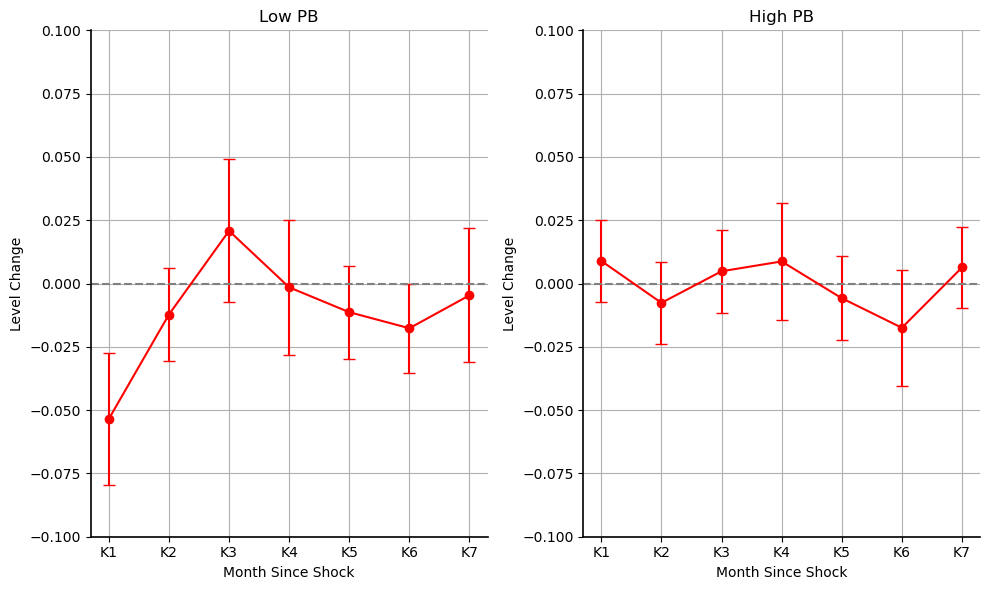

In [15]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(low_brw_result_df_c.columns, low_brw_result_df_c.loc["Coeff"], yerr=low_brw_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
#axes[0].errorbar(high_brw_result_df.columns, high_brw_result_df.loc["Coeff"], yerr=high_brw_result_df.loc[ "95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("Low PB")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.1, 0.1) 

# Plot for Old Firms
axes[1].errorbar(high_brw_result_df_c.columns, high_brw_result_df_c.loc["Coeff"], yerr=high_brw_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)

axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("High PB")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.1, 0.1) 

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)



plt.tight_layout()
plt.show()


#### Plotting Results - BRW without controll variables

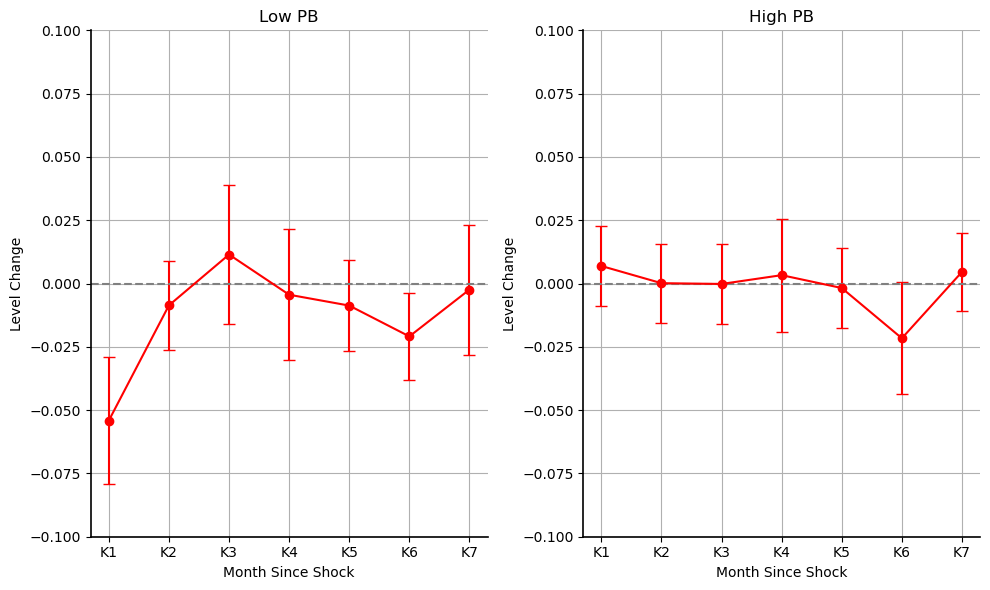

In [16]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(low_brw_result_df_nc.columns, low_brw_result_df_nc.loc["Coeff"], yerr=low_brw_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
#axes[0].errorbar(high_brw_result_df.columns, high_brw_result_df.loc["Coeff"], yerr=high_brw_result_df.loc[ "95% conf Interval"], fmt='-o', color='blue', ecolor='blue', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("Low PB")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.1, 0.1) 

# Plot for Old Firms
axes[1].errorbar(high_brw_result_df_nc.columns, high_brw_result_df_nc.loc["Coeff"], yerr=high_brw_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)

axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("High PB")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.1, 0.1) 

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)



plt.tight_layout()
plt.savefig("Data/Pictures/H4_brw_nc.png")
plt.show()


#### Plotting Results - FF4 With control Variables

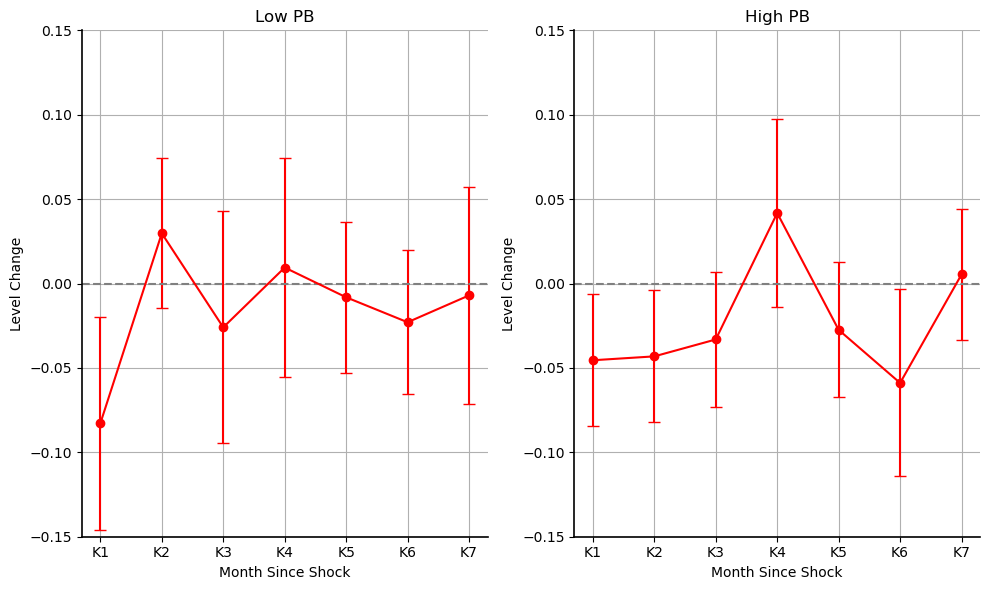

In [17]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(low_ff4_result_df_c.columns, low_ff4_result_df_c.loc["Coeff"], yerr=low_ff4_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("Low PB")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.15, 0.15) 

# Plot for Old Firms
axes[1].errorbar(high_ff4_result_df_c.columns, high_ff4_result_df_c.loc["Coeff"], yerr=high_ff4_result_df_c.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)

axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("High PB")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.15, 0.15) 

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)



plt.tight_layout()
plt.show()


#### Plotting Results - FF4 Without control Variables

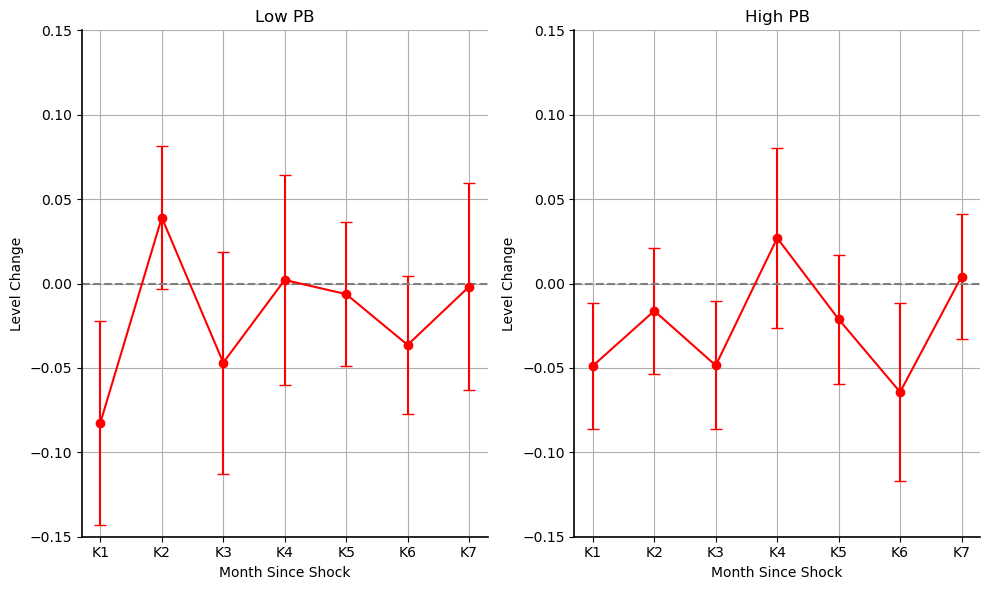

In [18]:
# Simulated Data
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Plot for Young Firms
axes[0].errorbar(low_ff4_result_df_nc.columns, low_ff4_result_df_nc.loc["Coeff"], yerr=low_ff4_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)
axes[0].axhline(0, color='gray', linestyle='dashed')
axes[0].set_title("Low PB")
axes[0].set_xlabel("Month Since Shock")
axes[0].set_ylabel("Level Change")
axes[0].grid()
axes[0].set_ylim(-0.15, 0.15) 

# Plot for Old Firms
axes[1].errorbar(high_ff4_result_df_nc.columns, high_ff4_result_df_nc.loc["Coeff"], yerr=high_ff4_result_df_nc.loc[ "95% conf Interval"], fmt='-o', color='red', ecolor='red', linestyle='solid', capsize=4)

axes[1].axhline(0, color='gray', linestyle='dashed')
axes[1].set_title("High PB")
axes[1].set_xlabel("Month Since Shock")
axes[1].set_ylabel("Level Change")
axes[1].grid()
axes[1].set_ylim(-0.15, 0.15) 

# Formatting the frames
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)



plt.tight_layout()
plt.savefig("Data/Pictures/H4_ff4_nc.png")
plt.show()
